![](files/images/EscUpmPolit_p.gif "UPM")

<header style="width: 100%; position: relative; text-align: center;">
  <div style="width: 80%; display: inline-block;">
    <h1 style="margin: 0; margin-bottom: 10px;">Procesado de datos de Blockchain</h1>
    <h3 style="margin: 0; margin-bottom: 20px;">TFM</h3>
    <h5 style="margin: 0;">Universidad Politécnica de Madrid. © Pablo Ruiz Giles</h5>
  </div>
</header>

A continuación se presenta un breve resumen de los puntos que se tratarán en el notebook:
    
- Comprar: Esta sección se centra en el proceso de compra y análisis de transacciones.

- Importar datasets: Se explica cómo importar los conjuntos de datos necesarios para el estudio, incluyendo los datasets "Secuencial" y "Etherscan".

- Procesamiento de los datos: En esta sección se describen los procesos aplicados a los datos, como la modificación de la columna "Coste en wei", la adición de columnas relacionadas con el tiempo (Diferencia de tiempos, Duración y Coste Total), la conversión de hexadecimal a decimal para el Gas utilizado, y la adición de columnas de Coste en dólares y Coste en dólares total.

- Representación: Aquí se presentan diferentes formas de representación gráfica de los datos, incluyendo la representación del Coste en dólares del Conjunto, la representación del Coste en dólares Individualizado, la representación del tiempo que tarda en cada transacción, la representación del Coste en dólares y tiempo que tarda en cada transacción, la representación del gas y su equivalencia en Coste en dólares, la representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque Individualizado y en Conjunto, la representación mediante BoxPlot del Gas utilizado y del Coste en dólares, la representación de la variación del coste total en función de la duración de las transacciones, y la representación del aumento del coste total en función de la duración.

- Resumen Total: Esta sección proporciona estadísticas generales del conjunto de datos.

<h1>Índice</h1>
	<ul>
		<li>Comprar</li>
		<li>Importar datasets
			<ul>
				<li><a href="#secuencial">Secuencial</a></li>
				<li><a href="#etherscan">Etherscan</a></li>
			</ul>
		</li>
		<li>Procesamos los datos
			<ul>
				<li><a href="#modificacion-wei">Modificación de la columna Coste en wei</a></li>
				<li><a href="#columnas-tiempo">Añadir columna Diferencia de tiempos, Duración y Coste Total</a></li>
				<li><a href="#conversion-hex-dec">Conversión de hexadecimal a decimal Gas utilizado</a></li>
				<li><a href="#columnas-dolares">Añadir columna Coste en dólares y Coste en dólares total</a></li>
			</ul>
		</li>
		<li>Representación
			<ul>
				<li><a href="#representacion-conjunto-dolares">Representación de Coste en dólares del Conjunto</a></li>
				<li><a href="#representacion-individual-dolares">Representación de Coste en dólares Individualizado</a></li>
				<li><a href="#representacion-tiempo">Representación del tiempo que tarda en cada transacción</a></li>
				<li><a href="#representacion-dolares-tiempo">Representación de Coste en dólares y tiempo que tarda en cada transacción</a></li>
				<li><a href="#representacion-gas-dolares">Representación del gas y su equivalencia en Coste en dólares</a></li>
				<li><a href="#dispersion-individual-dolares">Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque Individualizado</a></li>
				<li><a href="#dispersion-conjunto-dolares">Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque en Conjunto</a></li>
				<li><a href="#boxplot-gas">Representación mediante BoxPlot del Gas utilizado</a></li>
				<li><a href="#boxplot-dolares">Representación mediante BoxPlot del Coste en dólares</a></li>
				<li><a href="#representacion-variacion-duracion">Representación de la variación del coste total en función de la duración de las transacciones</a></li>
				<li><a href="#representacion-aumento-coste">Representación del aumento del coste total en función de la duración</a></li>
			</ul>
		</li>
		<li>Resumen Total
			<ul>
				<li><a href="#estadisticas">Estadísticas del conjunto de datos</a></li>
			</ul>
		</li>
	</ul>

# Importar datasets

<section id="secuencial">
  <h2>Secuencial</h2>

</section>

Importamos los datastes de datos y creamos un diccionario llamado datasets_resumen que contiene los datos anteriormente importados

In [1]:
import pandas as pd
import os

# Obtener la lista de carpetas en la carpeta datos/secuencial/
carpetas = [f for f in os.listdir('datos/secuencial/') if os.path.isdir(os.path.join('datos/secuencial/', f))]

# Crear un diccionario vacío para almacenar los DataFrames
datasets_resumen = {}

# Leer cada archivo CSV en cada carpeta y asignarlo a una variable con el nombre de la carpeta
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/secuencial/', carpeta)) if f.endswith('_datos.csv')]
    for f in csv_files:
        name = os.path.splitext(f)[0]
        name_without_suffix = name.replace('_secuencial_datos', '')
        vars()[name] = pd.read_csv(os.path.join('datos/secuencial/', carpeta, f))
        datasets_resumen[name_without_suffix] = eval(name)

# Imprimir los nombres de las variables creadas que contengan "_secuencial"
print("Los siguientes DataFrames se han creado:")
for var in sorted(datasets_resumen.keys()):
    print(var)


Los siguientes DataFrames se han creado:
arbitrum
arbitrum_bear
avalanche
celo
goerli
optimism
optimism_bear
polygon_bear
sepolia
sepolia_bear


#### Visualizamos

In [2]:
datasets_resumen

{'goerli':                                           Transacción  Estado Gas utilizado  \
 0   0x558f599a705443df2c2344ac1c918a3f7e3aee376f18...    True       0x10f60   
 1   0xfaa0f2e7e2cb175cac8fdd1f5374763604de79264aab...    True       0x10f6c   
 2   0x3d56897ff6be097b0d0f5883c93294f0afa1b6bc3d0a...    True       0x10f6c   
 3   0x235d5dc3158ba7685d1805579c64dec5bcbfd9202915...    True        0xcca0   
 4   0x906a89c0105ea0a3b3092976859e3ff64df7a5eea9a3...    True        0xcca0   
 5   0x96727d2042b8db7107ba8cd47bfe4d03ef14702b1dff...    True        0xcca0   
 6   0xeca32227f92c987d3d4162785ee18084690310c12060...    True        0xcca0   
 7   0x448dfd0adc345f61ff433457c224bac582296b368fa1...    True        0xcca0   
 8   0x30484d5e39bcb904b40b70ca28608e8a86f9d6e79b91...    True        0xcca0   
 9   0xe83fd5c4400129f1908c999784022173ca14a3d67b39...    True        0xcca0   
 10  0x04040b5ad38d84fbc6cc7425419756c0c06fbda37b52...    True        0xcca0   
 11  0xfae64da078138e1bc5970c6

<section id="etherscan">
  <h2>Etherscan</h2>

</section>

Importamos los datastes de ethercan y creamos un diccionario llamado datasets_scan que contiene los datos anteriormente importandos

In [3]:
import pandas as pd
import os

# Crear un diccionario vacío para almacenar los DataFrames
datasets_scan = {}

# Obtener los archivos CSV en todas las subcarpetas que contengan '_secuencial' en su nombre
csv_files = []
for root, dirs, files in os.walk('datos/scan/'):
    for f in files:
        if 'scan' in f and f.endswith('.csv'):
            csv_file_path = os.path.join(root, f)
            name = os.path.splitext(os.path.basename(csv_file_path))[0]
            df = pd.read_csv(csv_file_path)
            vars()[name] = df
            datasets_scan[name] = df

# Imprimir los nombres de los DataFrames creados
print("Los siguientes DataFrames se han creado:")
for var_name in sorted(datasets_scan.keys()):
    print(var_name)


Los siguientes DataFrames se han creado:
scan_arbitrum
scan_avalanche
scan_boba
scan_celo
scan_goerli
scan_optimism
scan_sepolia


#### Visualizamos el tipo de datos que contiene etherscan

In [4]:
# Imprimir los nombres de las variables creadas que contengan "scan"
print("Los siguientes DataFrames se han creado:")
for var in sorted(datasets_scan.keys()):
    if 'scan' in var:
        print(var)

        # Acceder a cada DataFrame y asignar el índice a la columna "index_col"
        datasets_scan[var]['index_col'] = datasets_scan[var].index
        datasets_scan[var].info()

Los siguientes DataFrames se han creado:
scan_arbitrum
<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0x60fefc9d415057be9422701b7b470afef223402020fdbcb9f642f5399294debf to 0xb98ba76b2aa7a6237947cf677e13d9a4f265c2d38b912dfca57d20c87b463101
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Txhash                 117 non-null    int64  
 1   Blockno                117 non-null    int64  
 2   UnixTimestamp          117 non-null    object 
 3   DateTime               117 non-null    object 
 4   From                   106 non-null    object 
 5   To                     11 non-null     object 
 6   ContractAddress        117 non-null    float64
 7   Value_IN(ETH)          117 non-null    int64  
 8   Value_OUT(ETH)         117 non-null    float64
 9   CurrentValue @ $0/Eth  117 non-null    float64
 10  TxnFee(ETH)            117 non-null    float64
 11  TxnFee(USD)            115 non-null 

In [5]:
scan_arbitrum['CurrentValue @ $0/Eth']

0x60fefc9d415057be9422701b7b470afef223402020fdbcb9f642f5399294debf    0.002280
0xf23eebdf12cff06e725a3ae7dddb0676ce26b753dfc4b36f1c561ac6d43192f4    0.019765
0x8bad7bbde2fe3f330d07be36c02a22e61962ac79f5f8ada574c616f7d9944fd3    0.019526
0xea3c91f05d30e89eb24bdcabd735f0422eb97295c7055e5dee26bc332cfca452    0.000901
0x947dc3f9dc9461b6696856cb6dd6f6966ef5e6e68cd0a6f1328e1f554a54aff1    0.000901
                                                                        ...   
0x2d32586283e6b610c5b72b6a6b9f7c3bcb0dc4d7f18b651f7223405ea7e9c927    0.000029
0x3dc7f27b9af524d81d38e525192be00c7fd46756ee402c01d4bcb72667eef996    0.000029
0xb70d7fd60368a54bec106ab31c456453e56dba30f715323e6e3c0db44f8ca803    0.000031
0xc177595a3132214331ff400f5ec92d8a9eaa7182a5372936d7bc22a304ed2fdc    0.002234
0xb98ba76b2aa7a6237947cf677e13d9a4f265c2d38b912dfca57d20c87b463101    0.000031
Name: CurrentValue @ $0/Eth, Length: 117, dtype: float64

# Procesamiento



<section id="modificacion-wei">
  <h2> Modificación de la columna Coste en wei </h2>

</section>

Creamos una lista llamada formatted_transactions que contiene los hashes de las operaciones que hemos realizado. Estos hashes se obtienen de los datasets de datos que se encuentran dentro de datasets_resumen


In [6]:
# Crear una lista con todas las transacciones formateadas como cadenas
formatted_transactions = []
for dataset in datasets_resumen.values():
    transacciones = [valor for valor in dataset['Transacción']]
    formatted_transactions += [str(valor)[:-1] for valor in transacciones]




Creamos un nuevo dataframe llamado df que contiene los hashes de las transacciones que coinciden con las de formatted_transactions y guardamos el valor de CurrentValue @ $0/Eth que indica el coste de la transacción. A su vez también se crea una nueva columna llamada index_col que guarda la dirección del hash

In [7]:
import pandas as pd

# Crear un DataFrame vacío para almacenar los DataFrames filtrados concatenados
df = pd.DataFrame()

# Iterar sobre las direcciones
for direccion in formatted_transactions:
    # Buscar en los datasets que empiezan con 'scan_' y contienen la dirección actual
    dataframes_direccion = [datasets_scan[k][datasets_scan[k]['index_col'] == direccion][['index_col', 'CurrentValue @ $0/Eth']] for k in datasets_scan.keys() if k.startswith('scan_')]

    # Concatenar los DataFrames filtrados en un solo DataFrame
    df = pd.concat([df] + dataframes_direccion)

# Imprimir información sobre el DataFrame concatenado resultante
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0x558f599a705443df2c2344ac1c918a3f7e3aee376f18957f1da53b0b67da185e to 0xb9520fac9ddf2bce1743ff4a4e2cc5da7d1942ae31ed32aff3a47175821d73c6
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index_col              150 non-null    object 
 1   CurrentValue @ $0/Eth  150 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB
None


Vemos la longitud del dataframe df. En este caso deberia de ser 25 * el numero de etherscan que se hayan cargado

In [8]:
# Imprimir la longitud del DataFrame
print(len(df))




150


A continuación, vemos que valores de la columna index_col de df coinciden con la columna Transacción de los datasets de datos. Los que coincidan se sustituirá el valor de Coste en wei por el de CurrentValue @ $0/Eth que es el correcto

In [9]:
# Iterar sobre los DataFrames en el diccionario `datasets_resumen`
for k, df_resumen in datasets_resumen.items():
    # Iterar sobre las transacciones en el DataFrame `df`
    for index, row in df.iterrows():
        # Obtener la dirección de la transacción actual
        direccion = row['index_col']
        # Añadimos : para que sea igual a las transacciones de los datos
        direccion = row['index_col'] + ":"

        # Obtener el valor de la transacción actual
        valor = row['CurrentValue @ $0/Eth']
        # Buscar si la dirección de la transacción actual coincide con la columna "Transacción" del DataFrame del diccionario `datasets_resumen`
        mask = df_resumen['Transacción'] == direccion
        # Si hay una coincidencia, establecer el valor de "Coste en wei" en el valor de la transacción actual
        if mask.any():
            df_resumen.loc[mask, 'Coste en wei'] = valor


<section id="columnas-tiempo">
  <h2>Añadir columna Diferencia de tiempos, Duración y Coste Total</h2>

</section>

#### Crear una lista con los nombres de los datasets

In [10]:
import os

# Obtener la lista de carpetas en la carpeta datos/secuencial/
carpetas = [f for f in os.listdir('datos/secuencial/') if os.path.isdir(os.path.join('datos/secuencial/', f))]

# Crear una lista para almacenar los nombres de los datasets
datasets = []

# Leer cada archivo CSV en cada carpeta y agregarlo a la lista datasets si termina en "_datos.csv"
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/secuencial/', carpeta)) if f.endswith('_datos.csv')]
    for f in csv_files:
        datasets.append(os.path.splitext(f)[0])

# Imprimir los nombres de los datasets creados
print("Los siguientes datasets se han creado:")
for dataset in datasets:
    print(dataset)


Los siguientes datasets se han creado:
goerli_secuencial_datos
arbitrum_secuencial_datos
avalanche_secuencial_datos
optimism_secuencial_datos
optimism_bear_secuencial_datos
celo_secuencial_datos
sepolia_bear_secuencial_datos
arbitrum_bear_secuencial_datos
sepolia_secuencial_datos
polygon_bear_secuencial_datos


### Diferencia de tiempos, Duración y Coste Total

Diferencia de tiempos: Es el tiempo que ha tardado en procesarse una transacción

Duración: Es la suma de las transacciones anteriores para ver como va aumentando el tiempo con la suma de transacciones

Coste total: Es la suma de las transacciones anteriores para ver como va aumentando el ether con la suma de transacciones

In [11]:


# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Convertir la columna "Tiempo" a tipo datetime
    globals()[dataset]["Tiempo"] = pd.to_datetime(globals()[dataset]["Tiempo"])

    # Calcular la diferencia de tiempo entre cada fila y la anterior, en segundos
    globals()[dataset]["Diferencia de tiempo"] = (globals()[dataset]["Tiempo"] - globals()[dataset]["Tiempo"].shift(1)).dt.total_seconds()

    # Inicializar el primer valor de la columna "Duración" con el valor de la primera fila de la columna "Diferencia de tiempo"
    globals()[dataset].loc[0, "Duración"] = globals()[dataset].loc[0, "Diferencia de tiempo"]

    # Sumar el primer valor de la columna "Duración" al resto de los valores en la columna "Duración"
    globals()[dataset]["Duración"] = globals()[dataset]["Duración"] + globals()[dataset].loc[0, "Duración"]

    # Sumar la columna "Diferencia de tiempo" al resto de los valores en la columna "Duración"
    globals()[dataset]["Duración"] = globals()[dataset]["Diferencia de tiempo"].cumsum().fillna(method='ffill')

    # Calcular la media de la columna "Diferencia de tiempo"
    media_diferencia_tiempo = globals()[dataset]["Diferencia de tiempo"].mean()

    # Reemplazar los valores NaN con la media de las otras filas
    globals()[dataset]["Diferencia de tiempo"].fillna(media_diferencia_tiempo, inplace=True)
    # Reemplazar los valores NaN con la media de las otras filas
    globals()[dataset]["Duración"].fillna(globals()[dataset]["Diferencia de tiempo"][0], inplace=True)
    
    # Crear una columna llamada "Coste total" que sea la suma de la columna "Coste en wei"
    globals()[dataset]["Coste total"] = globals()[dataset]["Coste en wei"].cumsum()


# Iterar sobre la lista de nombres de datasets, pero saltarse la primera iteración
for dataset in datasets:
    globals()[dataset]["Duración"] =  globals()[dataset]["Duración"] +  globals()[dataset]["Duración"][0]

# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Modificar el valor de Duración de la primera fila en el DataFrame original
    globals()[dataset].loc[0, "Duración"] = globals()[dataset]["Diferencia de tiempo"][0]    


<section id="conversion-hex-dec">
  <h2>Conversión de hexadecimal a decimal Gas utilizado</h2>

</section>

Hacemos una conversión de hexadecimal a decimal de la columna de Gas Utilizado

In [12]:
#Gas utilizado 
import pandas as pd

def hex_to_dec(datos):
    # Convierte la columna "Gas utilizado" de hexadecimal a decimal
    datos["Gas utilizado"] = datos["Gas utilizado"].apply(lambda x: int(x, 16))
    
    # Devuelve el DataFrame modificado
    return datos


# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Aplicar la función a la columna "Gas utilizado" del DataFrame
    globals()[dataset] = hex_to_dec(globals()[dataset])
    
    # Imprimir el DataFrame resultante
    print(globals()[dataset].head())

                                         Transacción  Estado  Gas utilizado  \
0  0x558f599a705443df2c2344ac1c918a3f7e3aee376f18...    True          69472   
1  0xfaa0f2e7e2cb175cac8fdd1f5374763604de79264aab...    True          69484   
2  0x3d56897ff6be097b0d0f5883c93294f0afa1b6bc3d0a...    True          69484   
3  0x235d5dc3158ba7685d1805579c64dec5bcbfd9202915...    True          52384   
4  0x906a89c0105ea0a3b3092976859e3ff64df7a5eea9a3...    True          52384   

   Coste en wei   Bloque              Tiempo  Diferencia de tiempo  Duración  \
0      0.001737  8852430 2023-05-12 03:17:48                  18.0      18.0   
1      0.001737  8852431 2023-05-12 03:18:00                  12.0      30.0   
2      0.001737  8852432 2023-05-12 03:18:36                  36.0      66.0   
3      0.001310  8852433 2023-05-12 03:18:48                  12.0      78.0   
4      0.001310  8852434 2023-05-12 03:19:00                  12.0      90.0   

   Coste total  
0     0.001737  
1     0.00



<section id="columnas-dolares">
  <h2>Añadir columna Coste en dólares y Coste en dólares total</h2>

</section>

Llevamos a cabo una conversión del precio del ether de cada criptomoneda a su equivalente en dólares estadounidenses en el instante en el que se recolectaron los datos

In [13]:
import pandas as pd

# Definir las constantes de conversión de cada conjunto de datos
conversion_constants = {
    "ether": 1904,
    "celo": 0.95,
    "avax": 22
}

# Definir la función para convertir a dólares
def wei_to_usd(datos, constant):
    # Agregar la nueva columna "Coste en dólares"
    datos["Coste en dólares"] = datos["Coste en wei"] * constant
    datos["Coste en dólares total"] = datos["Coste total"] * constant
    
    # Devolver el DataFrame modificado
    return datos

# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Obtener la constante correspondiente al conjunto de datos actual
    if "celo" in dataset:
        constant = conversion_constants['celo']
    elif "avalanche" in dataset:
        constant = conversion_constants['avax']
    else:
        constant = conversion_constants['ether']
    
    # Aplicar la función de conversión a dólares a la columna "Coste en wei"
    globals()[dataset] = wei_to_usd(globals()[dataset], constant)
    
    # Imprimir el DataFrame resultante
    print(globals()[dataset].head())


                                         Transacción  Estado  Gas utilizado  \
0  0x558f599a705443df2c2344ac1c918a3f7e3aee376f18...    True          69472   
1  0xfaa0f2e7e2cb175cac8fdd1f5374763604de79264aab...    True          69484   
2  0x3d56897ff6be097b0d0f5883c93294f0afa1b6bc3d0a...    True          69484   
3  0x235d5dc3158ba7685d1805579c64dec5bcbfd9202915...    True          52384   
4  0x906a89c0105ea0a3b3092976859e3ff64df7a5eea9a3...    True          52384   

   Coste en wei   Bloque              Tiempo  Diferencia de tiempo  Duración  \
0      0.001737  8852430 2023-05-12 03:17:48                  18.0      18.0   
1      0.001737  8852431 2023-05-12 03:18:00                  12.0      30.0   
2      0.001737  8852432 2023-05-12 03:18:36                  36.0      66.0   
3      0.001310  8852433 2023-05-12 03:18:48                  12.0      78.0   
4      0.001310  8852434 2023-05-12 03:19:00                  12.0      90.0   

   Coste total  Coste en dólares  Coste en d

# Representación

Observamos que todos los datos presentan la misma cantidad de elementos, lo que nos permite garantizar que las comparaciones efectuadas sean precisas y correctas.

In [14]:
for key, dataset_values in datasets_resumen.items():
    print(f"Longitud de la columna 'Coste en wei' en el DataFrame {key}: {len(dataset_values['Coste en wei'])}")


Longitud de la columna 'Coste en wei' en el DataFrame goerli: 25
Longitud de la columna 'Coste en wei' en el DataFrame arbitrum: 25
Longitud de la columna 'Coste en wei' en el DataFrame avalanche: 25
Longitud de la columna 'Coste en wei' en el DataFrame optimism: 25
Longitud de la columna 'Coste en wei' en el DataFrame optimism_bear: 25
Longitud de la columna 'Coste en wei' en el DataFrame celo: 25
Longitud de la columna 'Coste en wei' en el DataFrame sepolia_bear: 25
Longitud de la columna 'Coste en wei' en el DataFrame arbitrum_bear: 25
Longitud de la columna 'Coste en wei' en el DataFrame sepolia: 25
Longitud de la columna 'Coste en wei' en el DataFrame polygon_bear: 25



<section id="representacion-conjunto-dolares">
  <h2>Representación de Coste en dólares del Conjunto</h2>

</section>


Se representa en conjunto cual ha sido su coste en dolares y como ha ido subiendo o bajando con el tiempo dependiendo de que función se estaba ejecutando o en que momento.

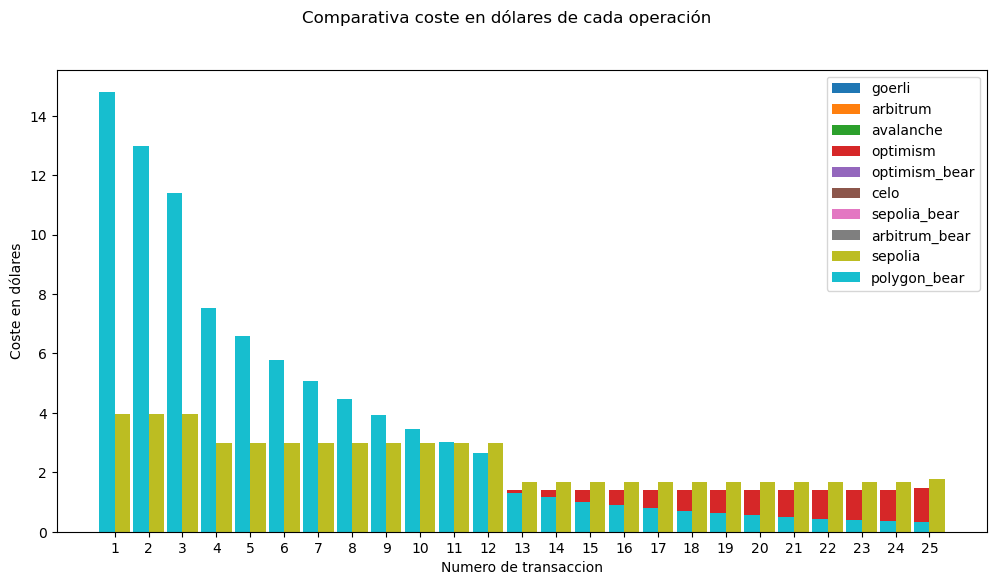

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración del gráfico
max_len = max([len(dataset_values['Coste en dólares']) for dataset_values in datasets_resumen.values()])
for dataset_values in datasets_resumen.values():
    dataset_values['Coste en wei'] = np.pad(dataset_values['Coste en dólares'], (0, max_len - len(dataset_values['Coste en dólares'])), mode='constant')
labels = [f"{i}" for i in range(1, max_len+1)]
x = np.arange(len(labels))
width = 0.45

# Crear el gráfico con figsize
fig, ax = plt.subplots(figsize=(12, 6))

# Iterar sobre el diccionario de datasets y agregar los datos al gráfico
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    ax.bar(x + ((-1)**i) * width/2, dataset_values['Coste en dólares'], width, label=f'{dataset_name}')

# Configurar las etiquetas y leyendas del gráfico
ax.set_ylabel('Coste en dólares')
ax.set_xlabel('Numero de transaccion')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.suptitle("Comparativa coste en dólares de cada operación")

# Mostrar el gráfico
plt.show()



<section id="representacion-individual-dolares">
  <h2>Representación de Coste en dólares Individualizado</h2>

</section>


Vamos a observar de forma individualizada cual ha sido su coste en dolares y como ha ido subiendo o bajando con el tiempo dependiendo de que función se estaba ejecutando o en que momento.

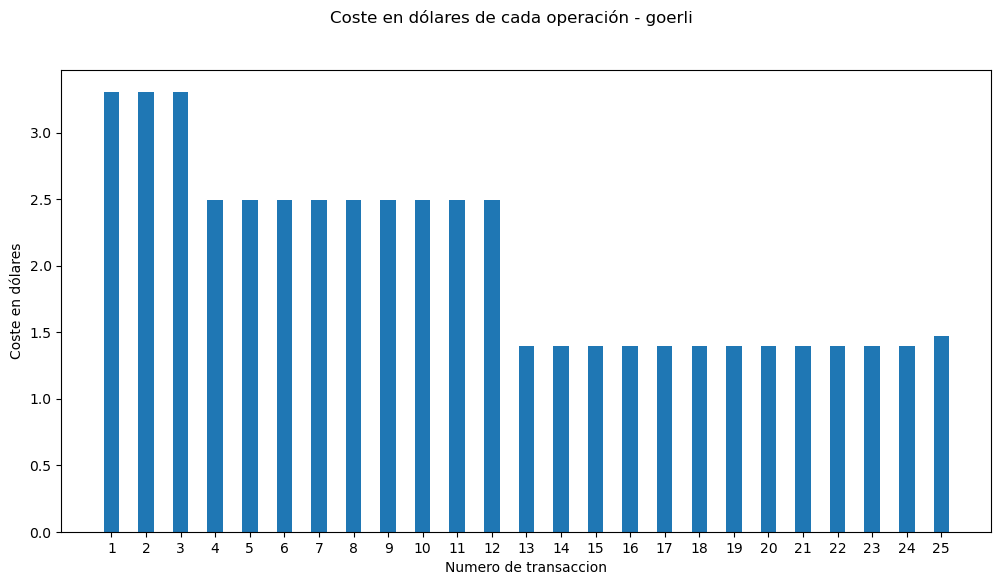

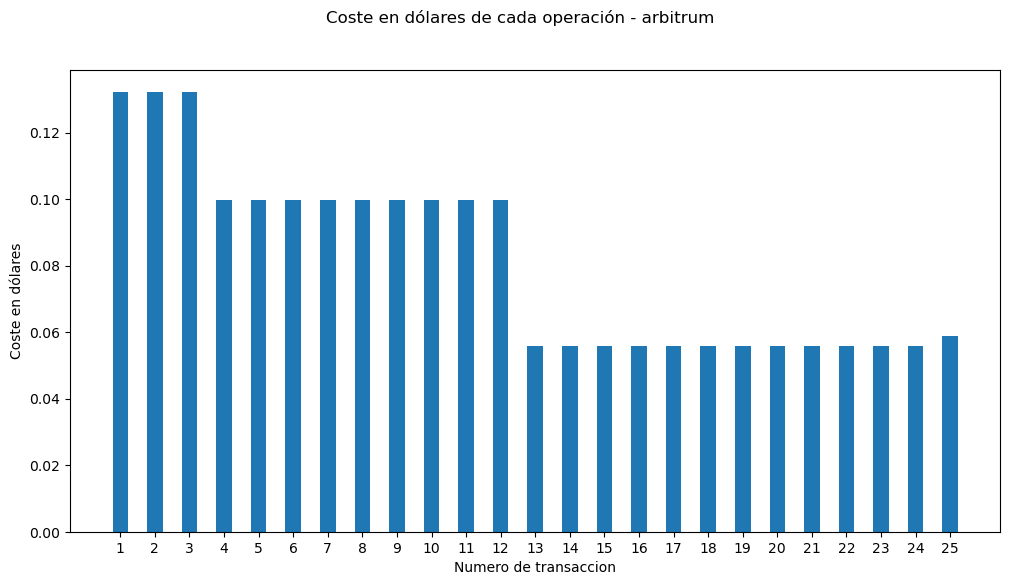

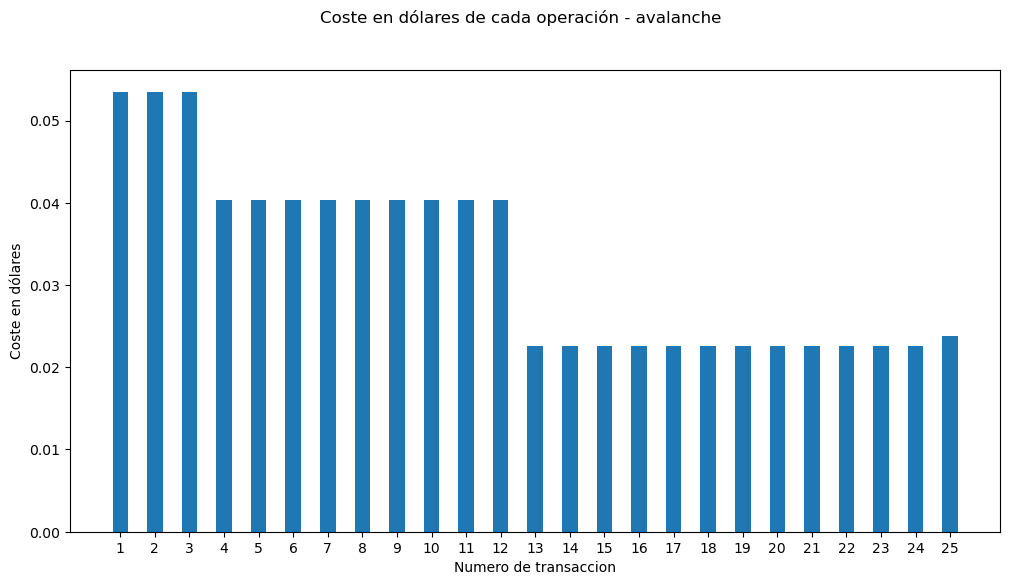

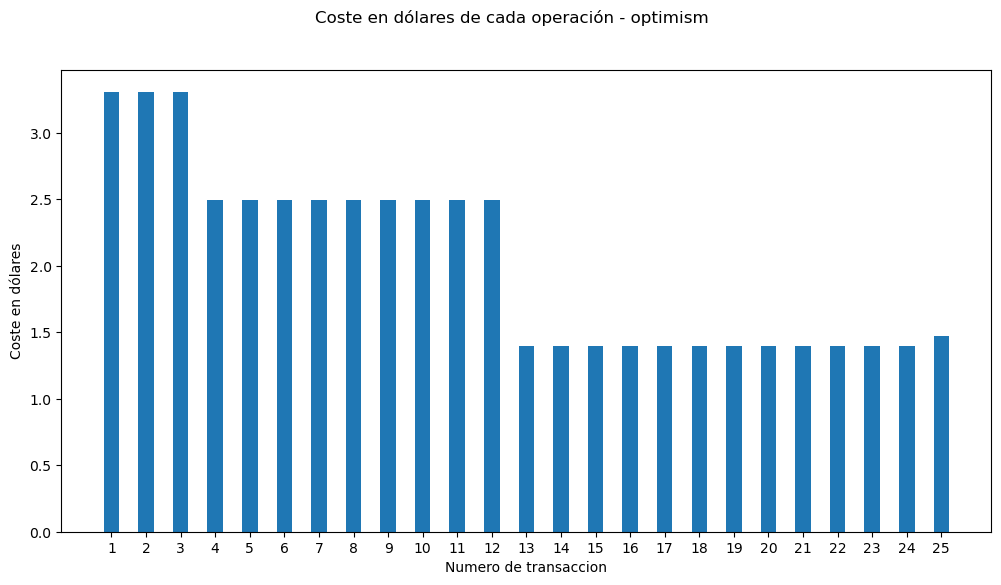

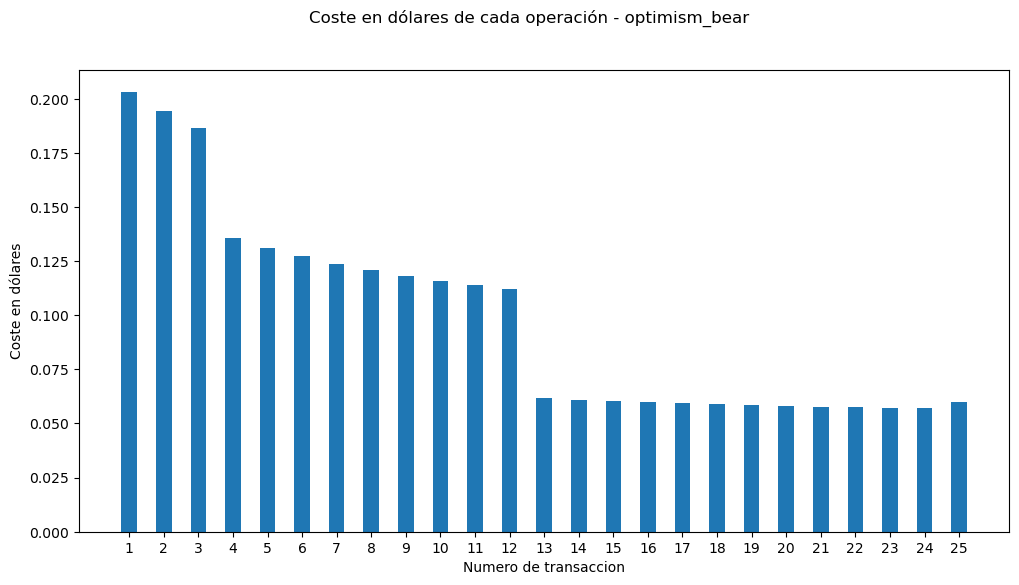

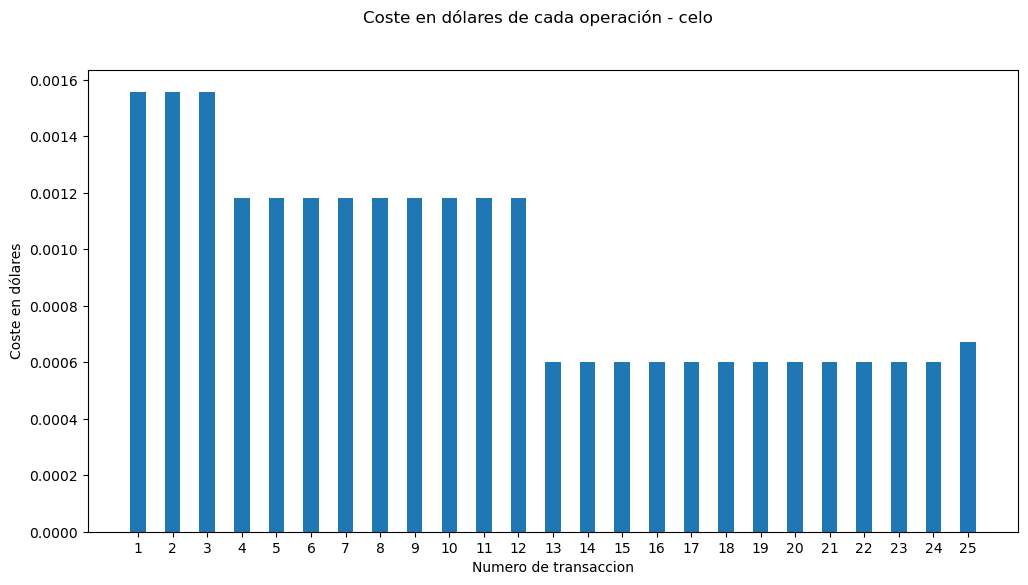

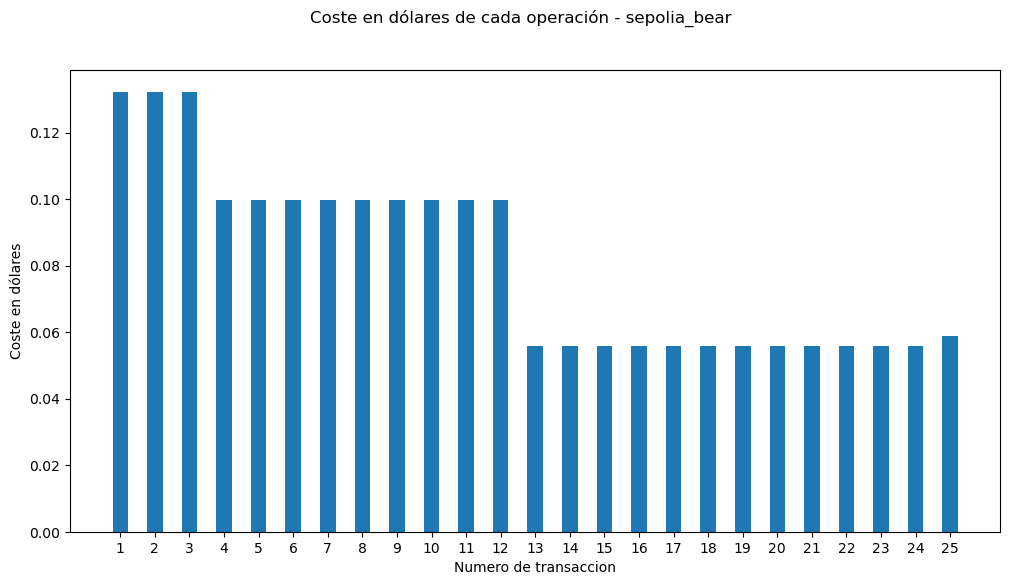

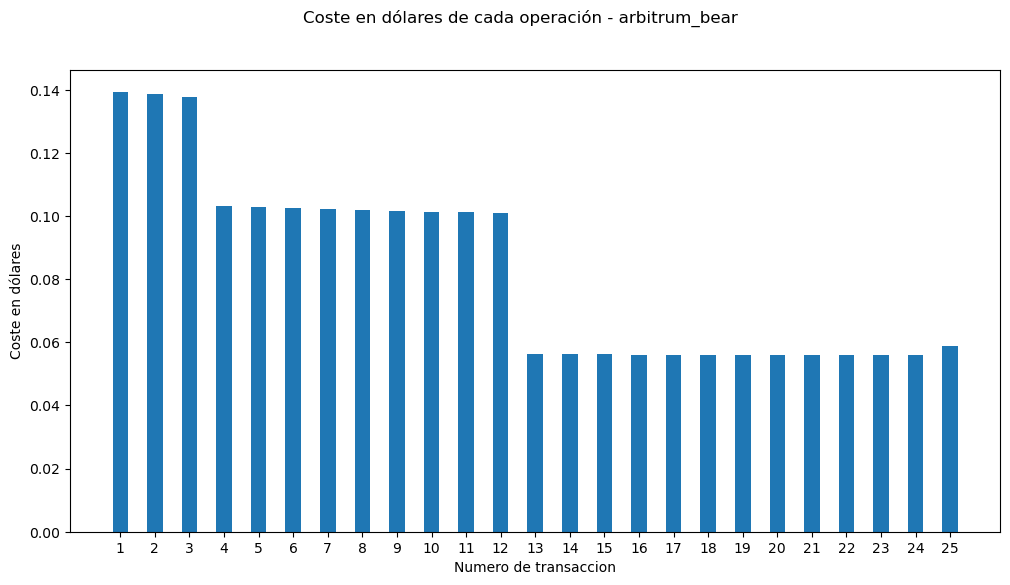

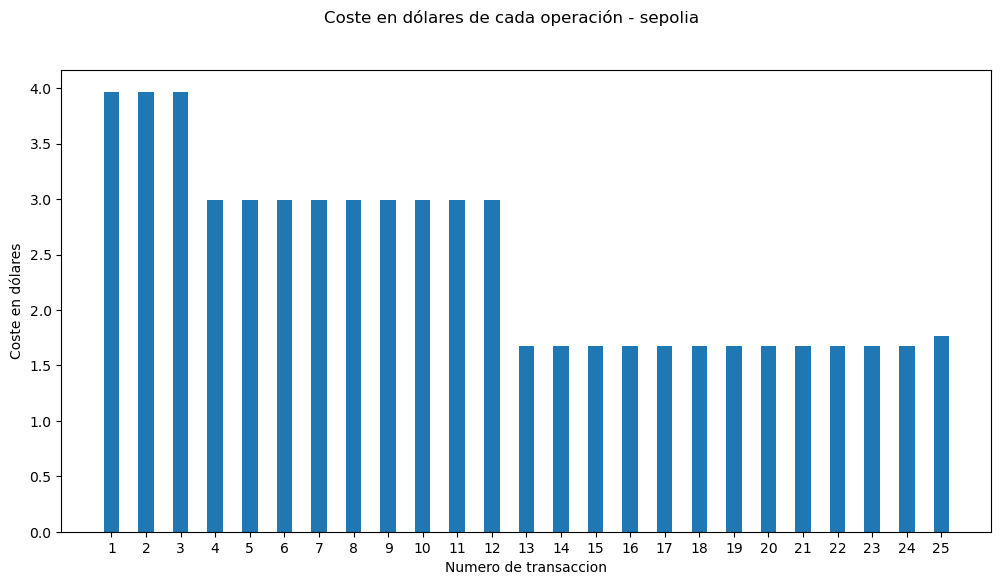

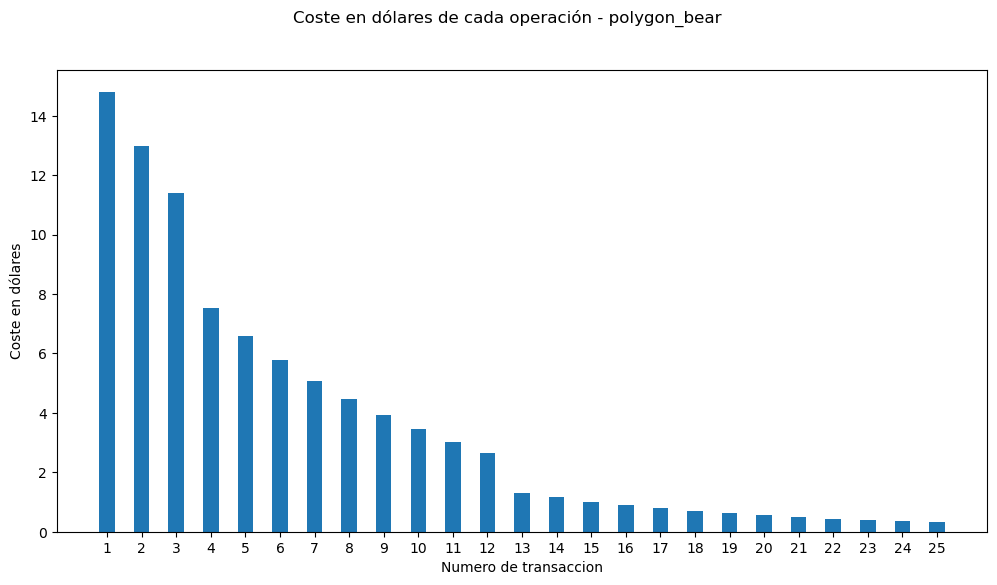

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparativa_compra(dataset_name, dataset):
    # Configuración del gráfico
    labels = [f"{i}" for i in range(1, len(dataset['Coste en dólares'])+1)]
    x = np.arange(len(labels))
    width = 0.45

    # Crear el gráfico con figsize
    fig, ax = plt.subplots(figsize=(12, 6))

    # Agregar los datos al gráfico
    ax.bar(x, dataset['Coste en dólares'], width)

    # Configurar las etiquetas y leyendas del gráfico
    ax.set_ylabel('Coste en dólares')
    ax.set_xlabel('Numero de transaccion')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    fig.suptitle(f"Coste en dólares de cada operación - {dataset_name}")

    # Mostrar el gráfico
    plt.show()

# Generar la gráfica para cada dataset
for dataset_name, dataset_values in datasets_resumen.items():
    plot_comparativa_compra(dataset_name, dataset_values)


	

<section id="representacion-tiempo">
  <h2>Representación del tiempo que tarda en cada transacción</h2>

</section>

En esta representaciń se procederá a examinar en su totalidad el coste en dólares de estas transacciones, y cómo ha variado en función del tiempo y del tipo de función que se estaba ejecutando

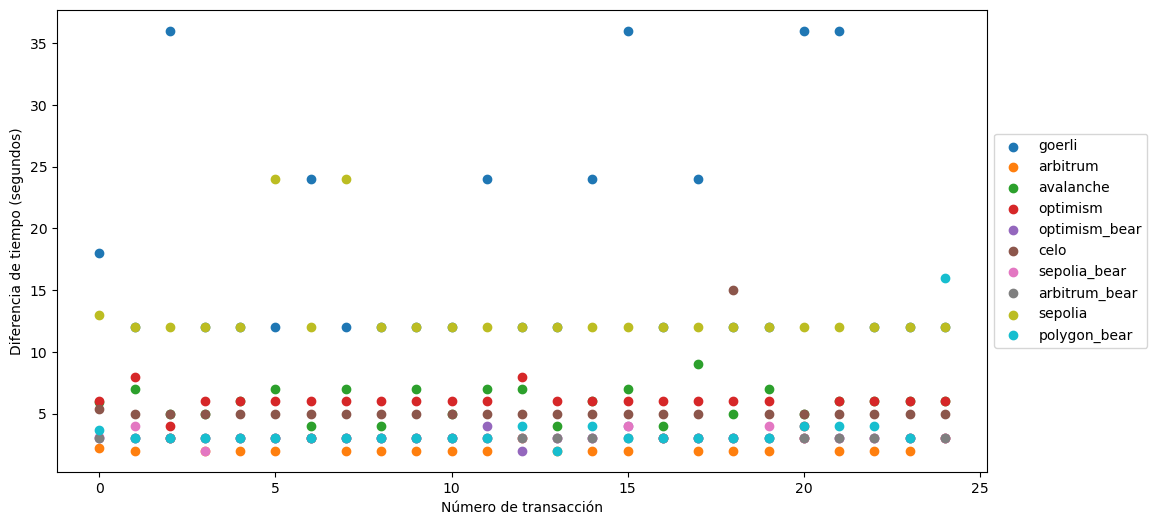

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

for dataset_name, dataset_values in datasets_resumen.items():
    ax.scatter(dataset_values.index, dataset_values['Diferencia de tiempo'], label=dataset_name)

# Configurar las etiquetas y leyendas del gráfico
ax.set_ylabel('Diferencia de tiempo (segundos)')
ax.set_xlabel('Número de transacción')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Mostrar el gráfico
plt.show()



<section id="representacion-dolares-tiempo">
  <h2>Representación de Coste en dólares y tiempo que tarda en cada transacción</h2>

</section>

Se va a observar el tiempo que tarda cada transacción de forma individual en completarse y el coste que ha tendo dicha transacción.

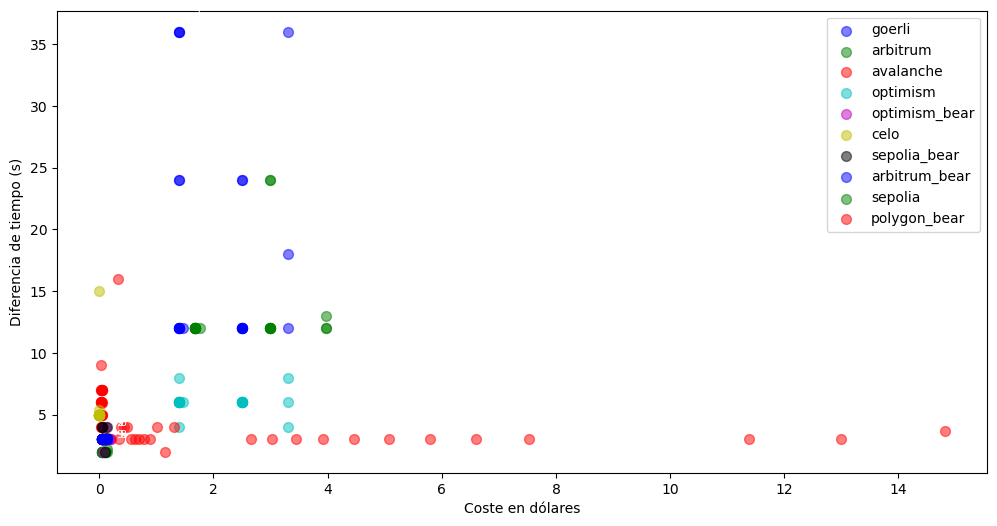

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración del gráfico
size = 50
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
max_len = max([len(dataset_values['Coste en dólares']) for dataset_values in datasets_resumen.values()])
for dataset_values in datasets_resumen.values():
    dataset_values['Coste en dólares'] = np.pad(dataset_values['Coste en dólares'], (0, max_len - len(dataset_values['Coste en wei'])), mode='constant')
labels = [f"{i}" for i in range(1, max_len+1)]
x = np.arange(len(labels))
width = 0.45

# Crear el gráfico con figsize
fig, ax = plt.subplots(figsize=(12, 6))

# Iterar sobre el diccionario de datasets y agregar los datos al gráfico de dispersión
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    ax.scatter(dataset_values['Coste en wei'], dataset_values['Diferencia de tiempo'], s=size, c=colors[i%len(colors)], alpha=0.5, label=f'{dataset_name}')
    
    # Agregar el número de puntos en cada posición
    points_dict = {}
    for j in range(len(dataset_values['Coste en dólares'])):
        point = (dataset_values['Coste en dólares'][j], dataset_values['Diferencia de tiempo'][j])
        if point in points_dict:
            points_dict[point] += 1
        else:
            points_dict[point] = 1
    for point, count in points_dict.items():
        if count > 1:
            ax.annotate(f"{count}", xy=point, xytext=(10, 10), textcoords='offset points', fontsize=8, color='white')

# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Coste en dólares')
ax.set_ylabel('Diferencia de tiempo (s)')
ax.legend()

# Mostrar el gráfico
plt.show()


Vemos de forma numérica la cantidad de transaccione que han coincidido en coste y tiempo para poder hacernos una idea del tiempo que tardaría y el coste que supondría cada transacción de media

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Crear una lista vacía para almacenar los DataFrames
dataframes = []

# Recorrer el diccionario y agregar cada DataFrame a la lista
# Agregar columna 'Fuente' a cada DataFrame
for dataset_name, dataset_values in datasets_resumen.items():
    dataset_values['Fuente'] = dataset_name.replace("_secuencial_datos", "")
    dataframes.append(dataset_values)

# Concatenar los DataFrames en la lista
datos = pd.concat(dataframes, axis=0, ignore_index=True)

# Contar el número de puntos con las mismas coordenadas y fuente
conteo = datos.groupby(['Diferencia de tiempo', 'Coste en dólares', 'Fuente']).size().reset_index(name='coincidencia')

# Ordenar los resultados por la columna 'coincidencia' de mayor a menor
conteo = conteo.sort_values(by=['coincidencia'], ascending=False)

# Crear una columna que indique la fuente de cada punto
for dataset_name in datasets_resumen:
    conteo['Fuente'] = conteo['Fuente'].apply(lambda x: dataset_name if x == dataset_name else x)

# Mostrar los resultados en formato de tabla
display(conteo.style.set_properties(**{'text-align': 'center'}).hide_index())


Diferencia de tiempo,Coste en dólares,Fuente,coincidencia
12.000000,1.671617,sepolia,11
5.000000,0.000602,celo,10
2.000000,0.055721,arbitrum,9
5.000000,0.001182,celo,9
3.000000,0.055721,sepolia_bear,9
3.000000,0.099739,sepolia_bear,8
2.000000,0.099739,arbitrum,8
12.000000,2.992174,sepolia,7
12.000000,2.493478,goerli,7
12.000000,1.393014,goerli,6



<section id="representacion-gas-dolares">
  <h2>Representación del gas y su equivalencia en Coste en dólares</h2>

</section>

Se observa en esta ocasión el gas que se ha necesitado para procesar cada transacción y su traducción a dólares

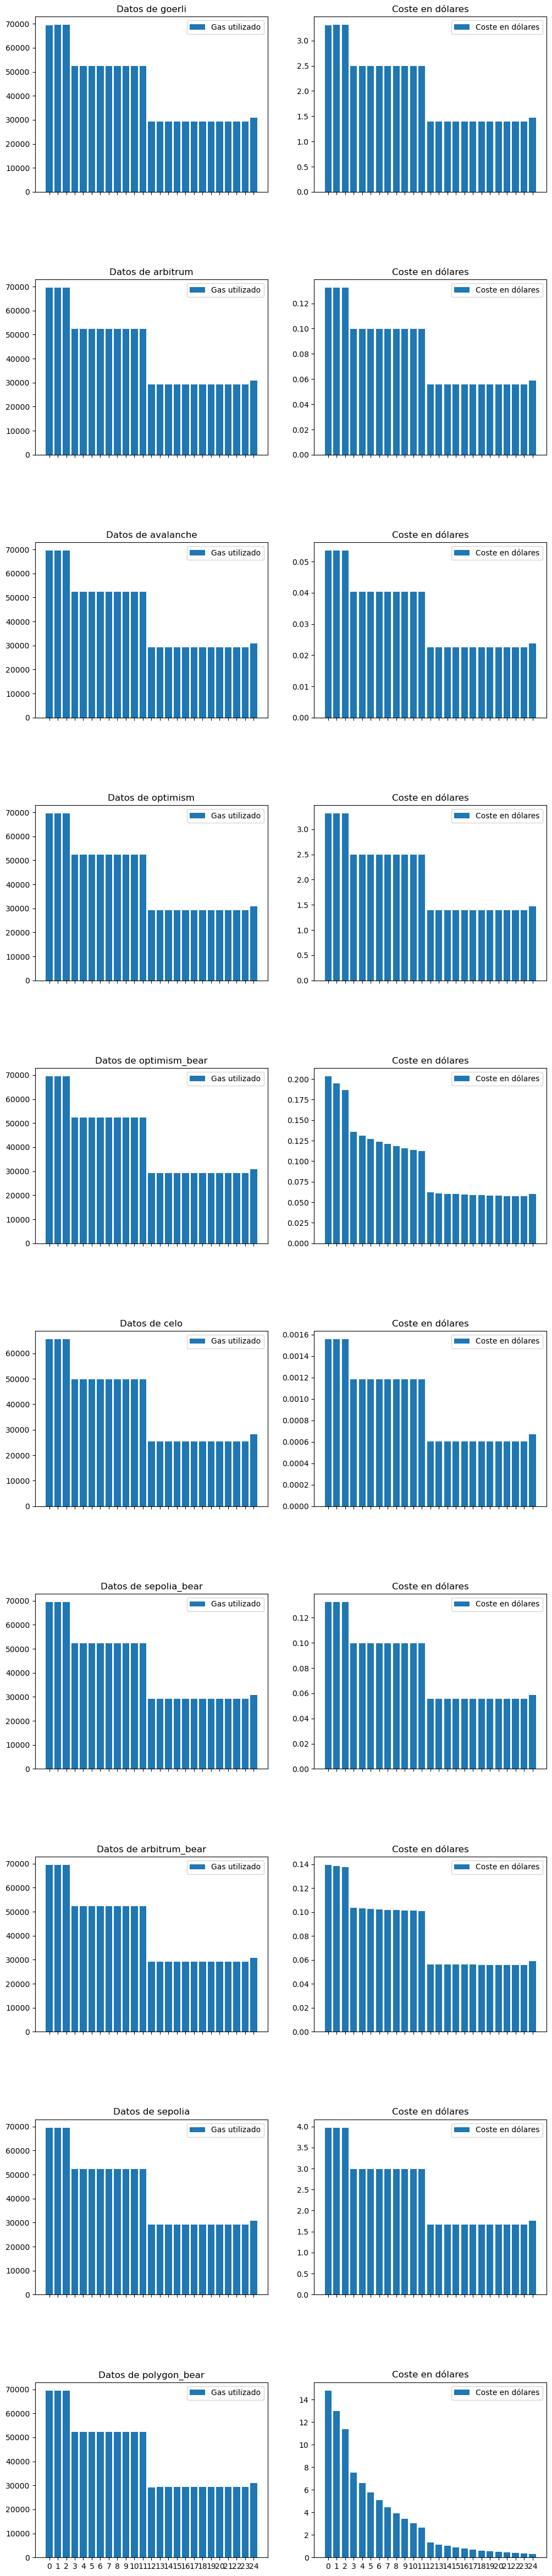

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
fig, axs = plt.subplots(len(datasets_resumen), 2, figsize=(12, 6*len(datasets_resumen)), sharex=True)
fig.subplots_adjust(hspace=0.5)

# Crear el gráfico de barras para cada conjunto de datos en datasets_resumen
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    axs[i, 0].bar(dataset_values.index, dataset_values["Gas utilizado"], label="Gas utilizado")
    axs[i, 0].legend()
    axs[i, 0].set_title("Gas utilizado")

    axs[i, 1].bar(dataset_values.index, dataset_values["Coste en dólares"], label="Coste en dólares")
    axs[i, 1].legend()
    axs[i, 1].set_title("Coste en dólares")
    axs[i, 1].set_xticks(dataset_values.index)
    axs[i, 1].set_xticklabels(dataset_values.index)

    # Añadir título a cada conjunto de gráficas
    axs[i, 0].set_title(f"Datos de {dataset_name}")

# Mostrar el gráfico
plt.show()


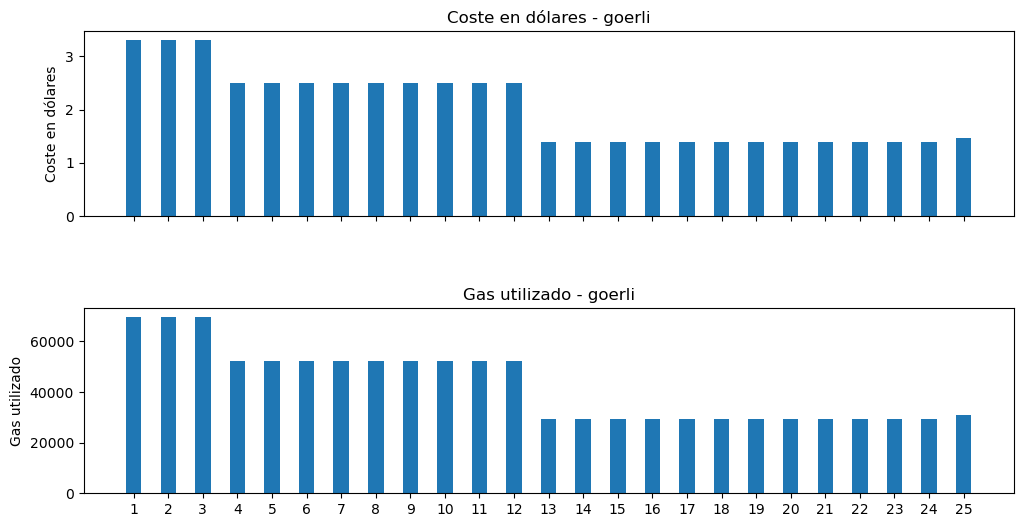

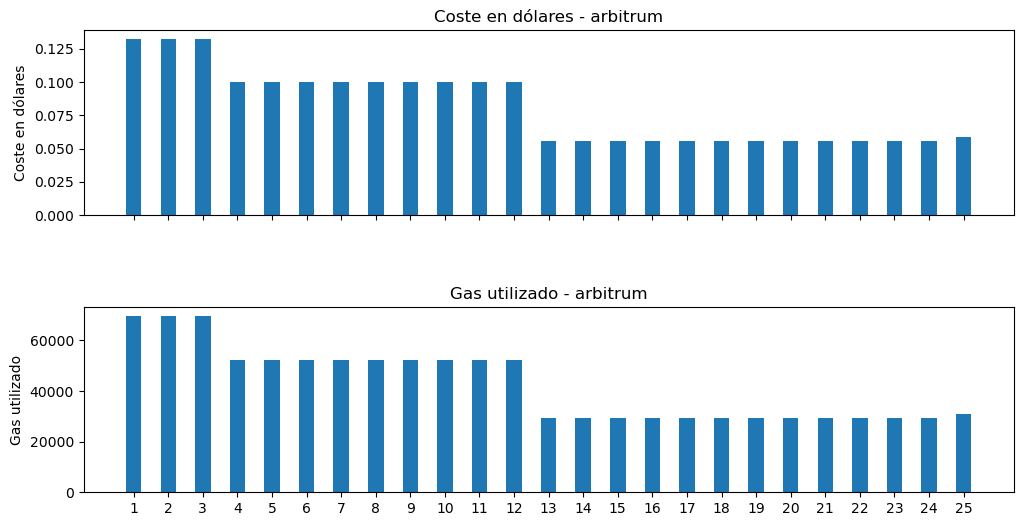

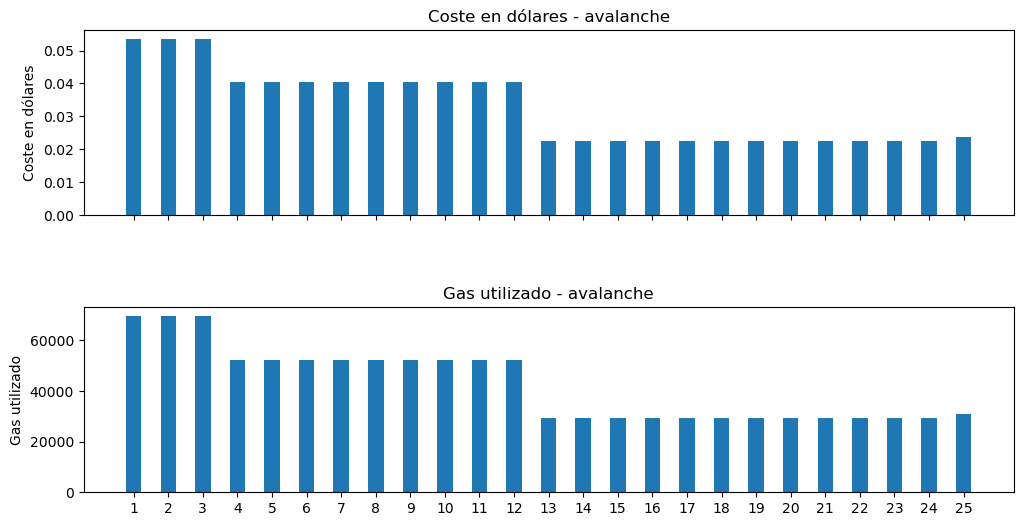

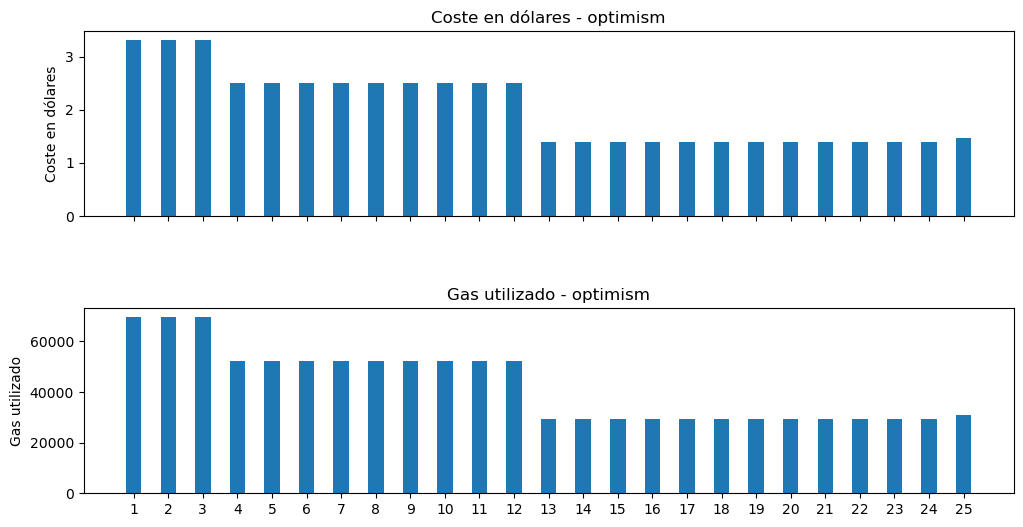

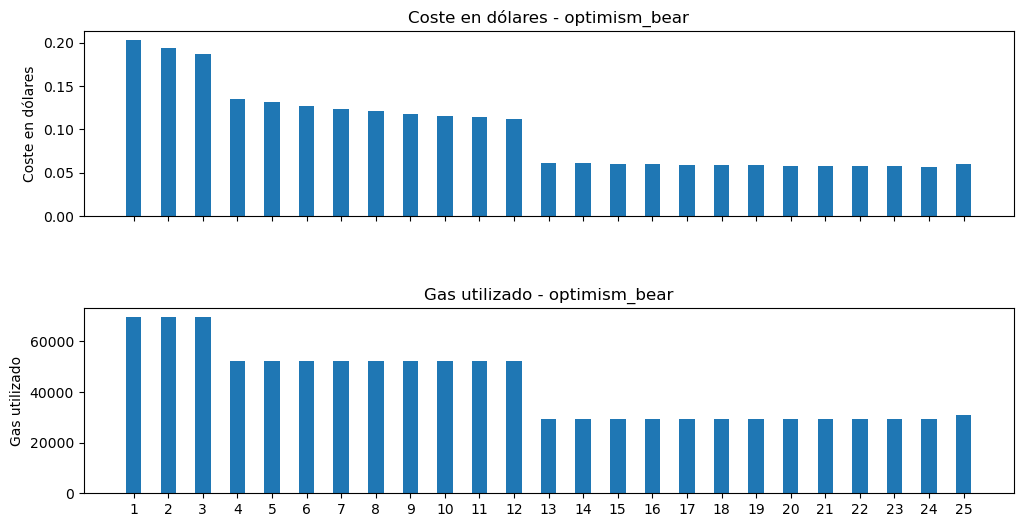

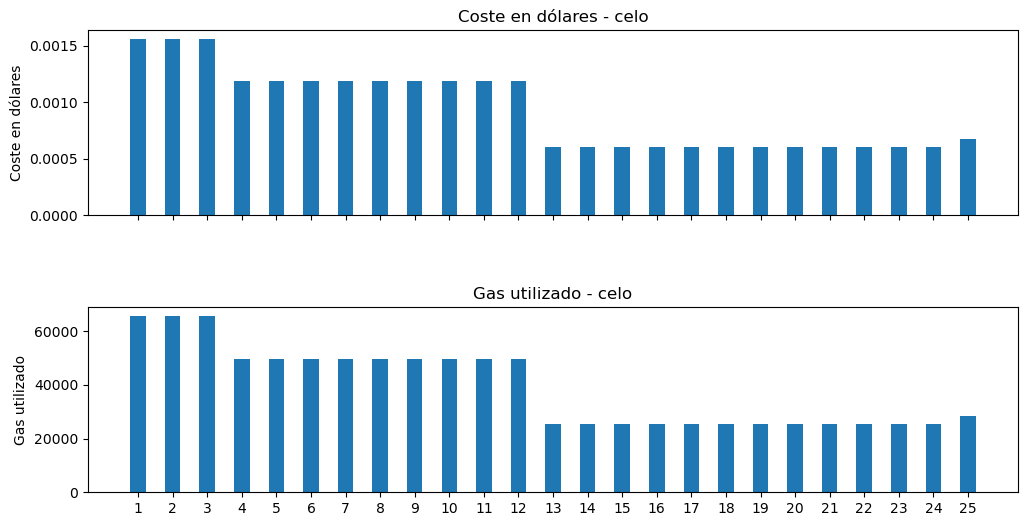

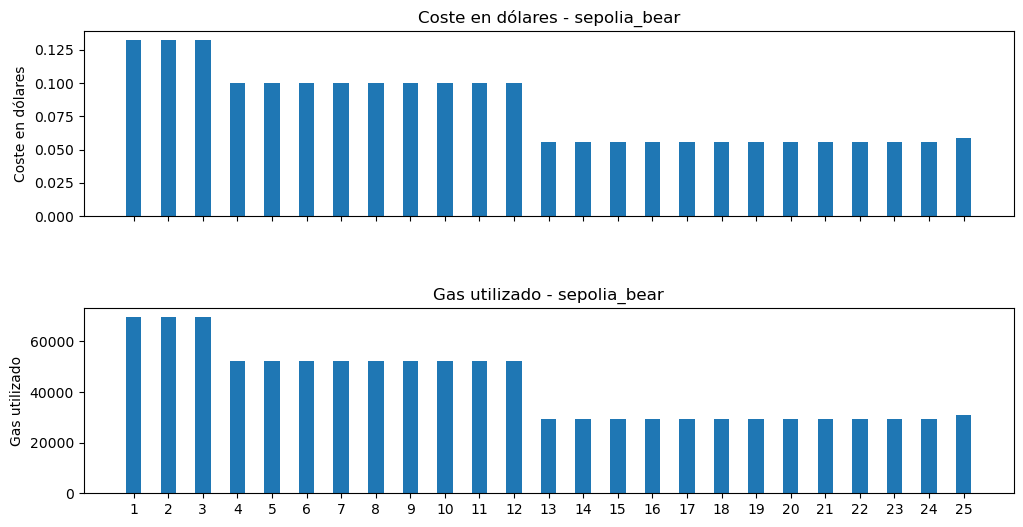

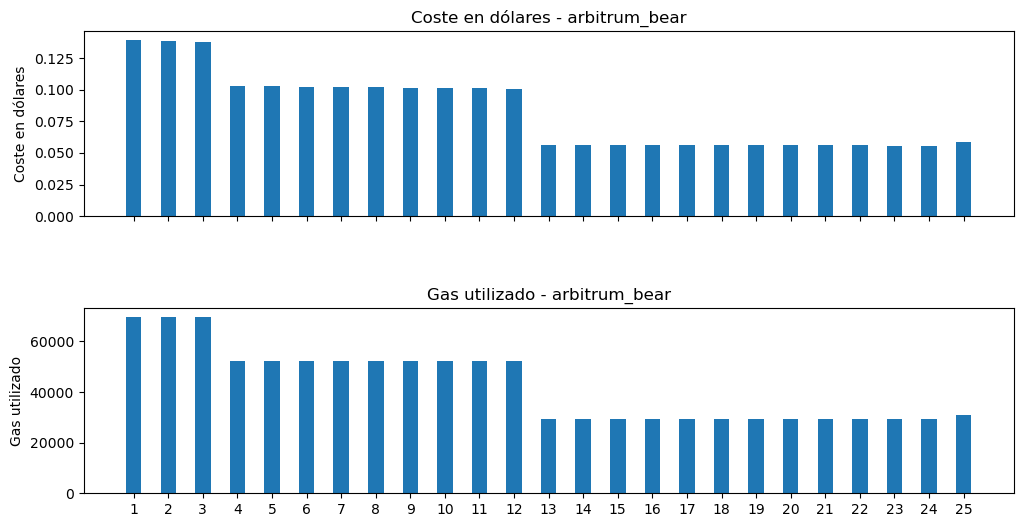

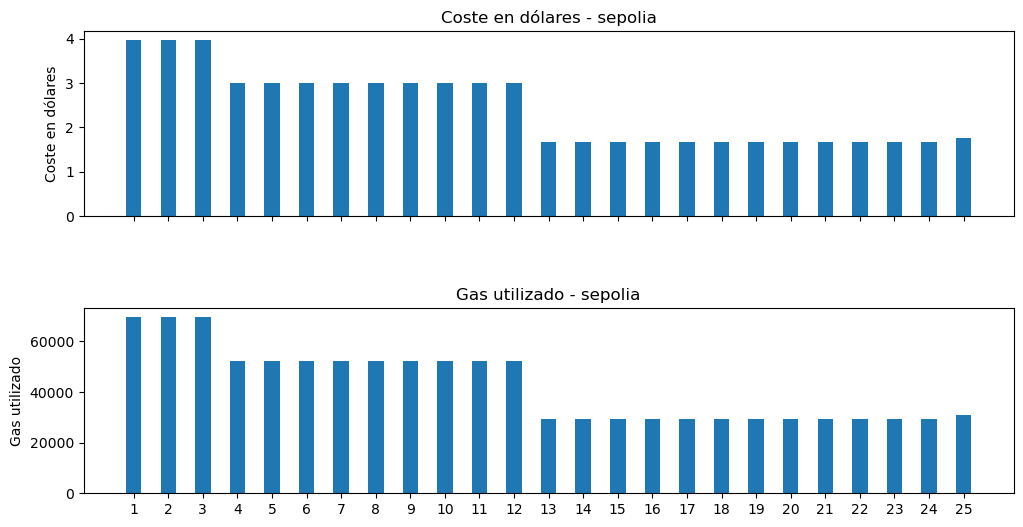

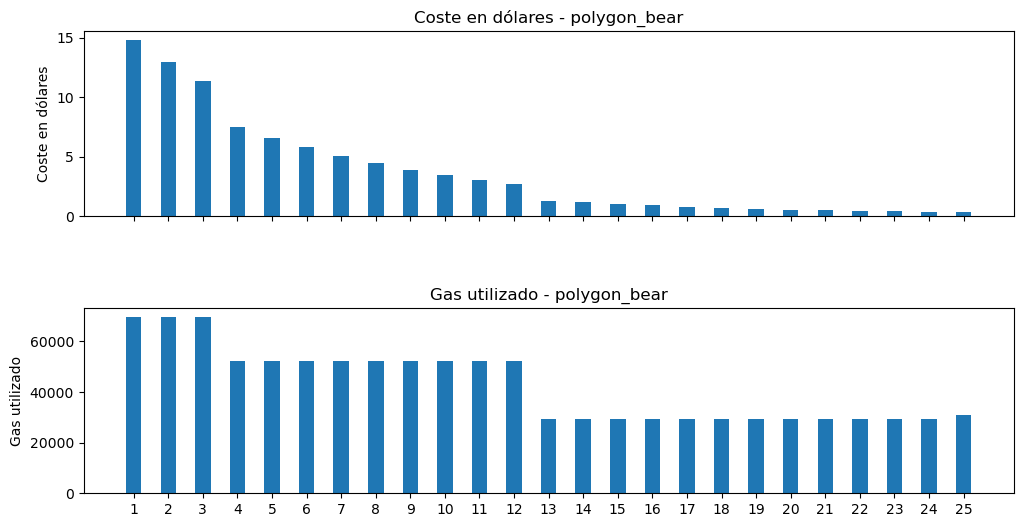

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparativa_compra(dataset_name, dataset):
    # Configuración del gráfico
    labels = [f"{i}" for i in range(1, len(dataset['Coste en dólares'])+1)]
    x = np.arange(len(labels))
    width = 0.45

    # Crear el gráfico con figsize
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)

    # Gráfico para Coste en wei
    axs[0].bar(x, dataset['Coste en dólares'], width)
    axs[0].set_ylabel('Coste en dólares')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].set_title(f"Coste en dólares - {dataset_name}")

    # Gráfico para Gas utilizado
    axs[1].bar(x, dataset['Gas utilizado'], width)
    axs[1].set_ylabel('Gas utilizado')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].set_title(f"Gas utilizado - {dataset_name}")

    # Mostrar el gráfico
    plt.show()

# Generar la gráfica para cada dataset
for dataset_name, dataset_values in datasets_resumen.items():
    plot_comparativa_compra(dataset_name, dataset_values)



<section id="dispersion-individual-dolares">
  <h2>Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque Individualizado</h2>

</section>

En esta representación veremos mediante un diagrama de dispersión como ha sido el gas utilizado y su respectivo coste en dólares.

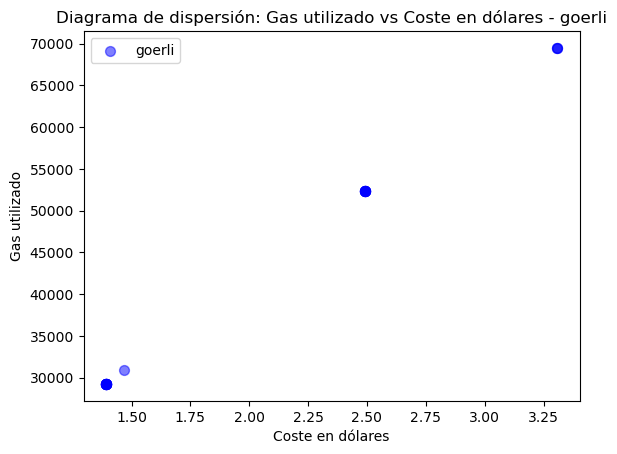

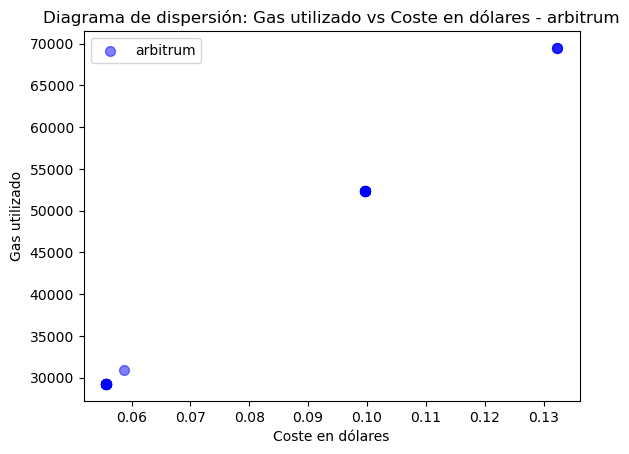

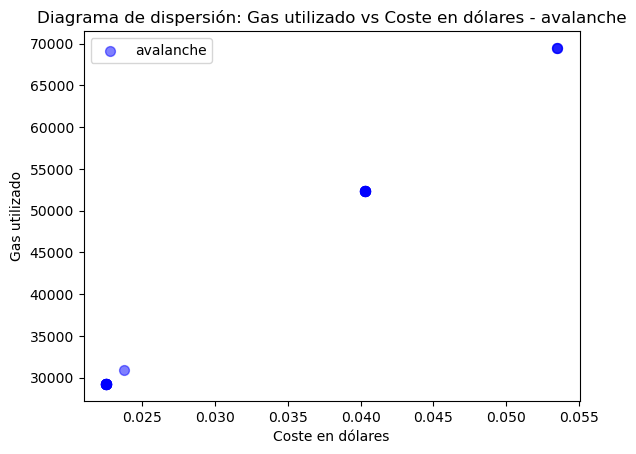

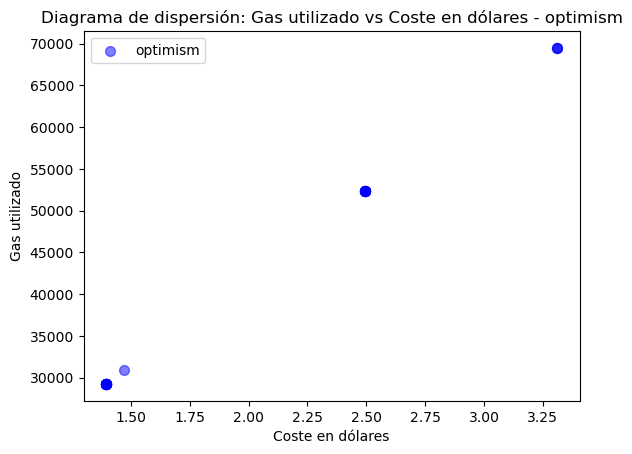

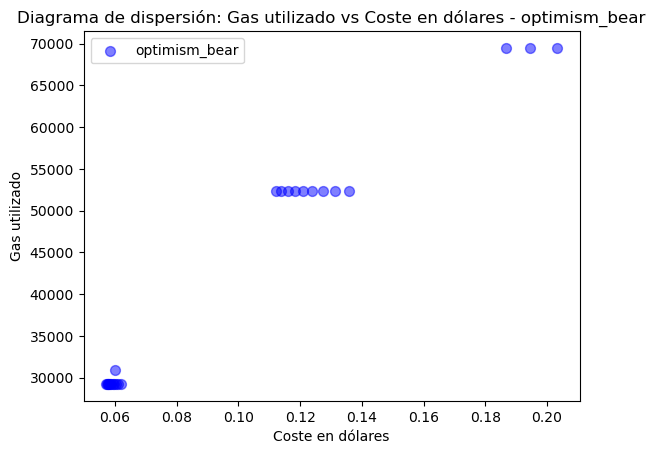

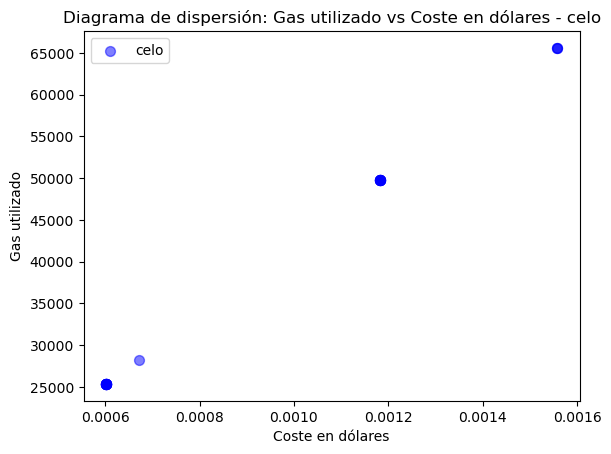

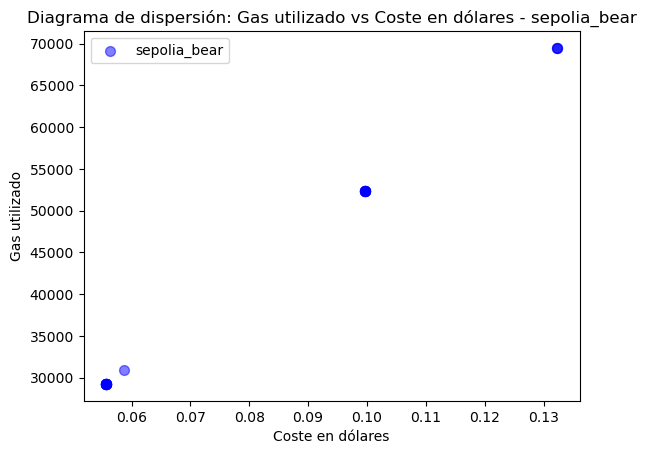

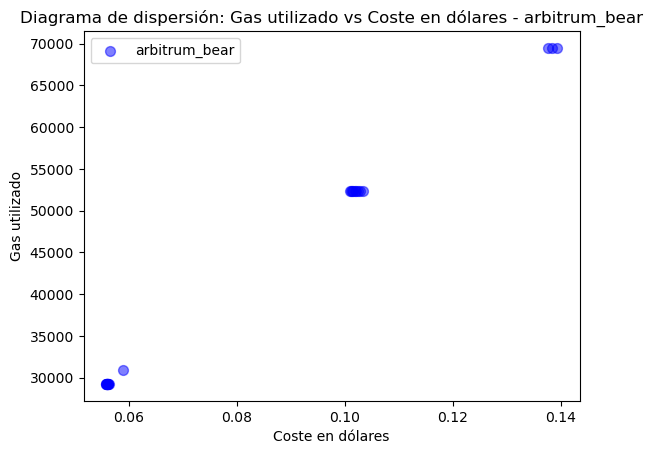

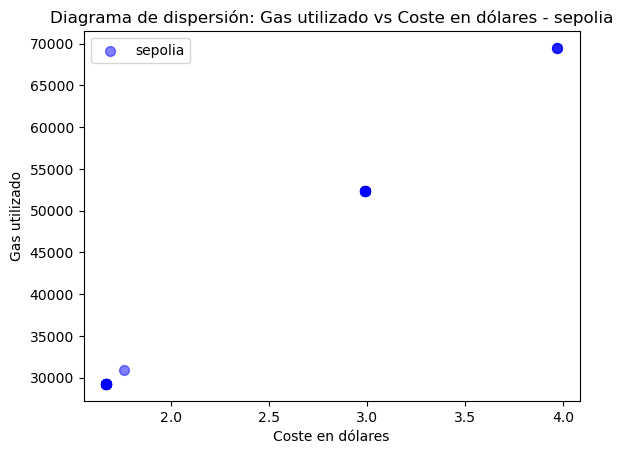

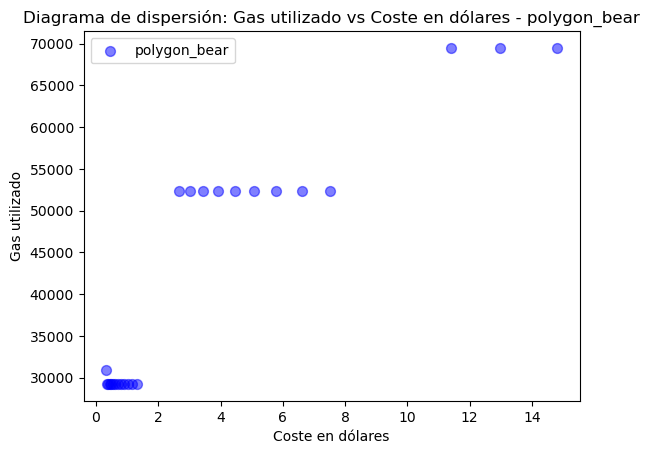

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter(dataset_name, dataset):
    # Configuración del gráfico
    x = dataset['Coste en dólares']
    y = dataset['Gas utilizado']
    size = 50
    colors = 'b'

    # Crear el gráfico de dispersión
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=size, c=colors, alpha=0.5, label=dataset_name)

    # Configurar las etiquetas y leyendas del gráfico
    ax.set_xlabel('Coste en dólares')
    ax.set_ylabel('Gas utilizado')
    ax.legend()

    # Añadir título al gráfico
    plt.title(f"Diagrama de dispersión: Gas utilizado vs Coste en dólares - {dataset_name}")

    # Mostrar el gráfico
    plt.show()

# Generar la gráfica de dispersión para cada dataset
for dataset_name, dataset_values in datasets_resumen.items():
    plot_scatter(dataset_name, dataset_values)



<section id="dispersion-conjunto-dolares">
  <h2>Representación de dispersión para comparar el Gas utilizado y el Coste en dólares por Bloque en Conjunto</h2>

</section>

En esta representación veremos mediante un diagrama de dispersión como ha sido el gas utilizado y su respectivo coste en dólares.

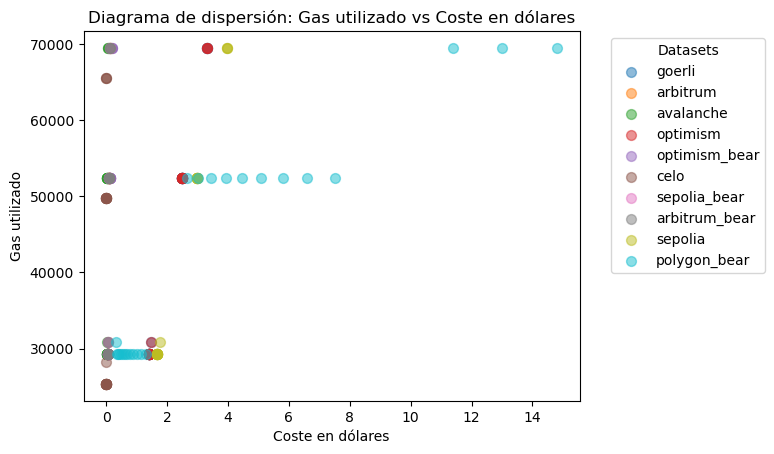

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Configuración del gráfico
fig, ax = plt.subplots()
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    x = dataset_values['Coste en dólares']
    y = dataset_values['Gas utilizado']
    size = 50

    # Crear el gráfico de dispersión
    ax.scatter(x, y, s=size,  alpha=0.5, label=dataset_name)

# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Coste en dólares')
ax.set_ylabel('Gas utilizado')
ax.legend(title='Datasets', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir título al gráfico
plt.title("Diagrama de dispersión: Gas utilizado vs Coste en dólares")

# Mostrar el gráfico
plt.show()


Vemos de forma numérica la cantidad de transaccione que han coincidido en coste y tiempo para poder hacernos una idea del tiempo que tardaría y el coste que supondría cada transacción de media

In [24]:
# Crear una lista vacía para almacenar los DataFrames
dataframes = []

# Recorrer el diccionario y agregar cada DataFrame a la lista
for dataset_name, dataset_values in datasets_resumen.items():
    dataset_values['Fuente'] = dataset_name
    dataframes.append(dataset_values)

# Concatenar los DataFrames en la lista
datos = pd.concat(dataframes, axis=0, ignore_index=True)

# Contar el número de puntos con las mismas coordenadas y fuente
conteo = datos.groupby(['Diferencia de tiempo', 'Coste en wei', 'Fuente']).size().reset_index(name='coincidencia')

# Ordenar los resultados por la columna 'coincidencia' de mayor a menor
conteo = conteo.sort_values(by=['coincidencia'], ascending=False)

# Crear una columna que indique la fuente de cada punto
for dataset_name in datasets_resumen:
    conteo['Fuente'] = conteo['Fuente'].apply(lambda x: dataset_name if x == dataset_name else x)


# Mostrar los resultados en formato de tabla
display(conteo.style.set_properties(**{'text-align': 'center'}).hide_index())


Diferencia de tiempo,Coste en wei,Fuente,coincidencia
12.000000,1.671617,sepolia,11
5.000000,0.000602,celo,10
2.000000,0.055721,arbitrum,9
5.000000,0.001182,celo,9
3.000000,0.055721,sepolia_bear,9
3.000000,0.099739,sepolia_bear,8
2.000000,0.099739,arbitrum,8
12.000000,2.992174,sepolia,7
12.000000,2.493478,goerli,7
12.000000,1.393014,goerli,6


### BoxPlot

El Boxplot nos permite visualizar la distribución de un conjunto de datos. El boxplot muestra la mediana (línea dentro de la caja), el rango intercuartil (la caja que va desde el primer cuartil al tercer cuartil), los valores mínimo y máximo (los bigotes), y los posibles valores atípicos o extremos (los puntos fuera de los bigotes)


<section id="boxplot-gas">
  <h2>Representación mediante BoxPlot del Gas utilizado</h2>

</section>

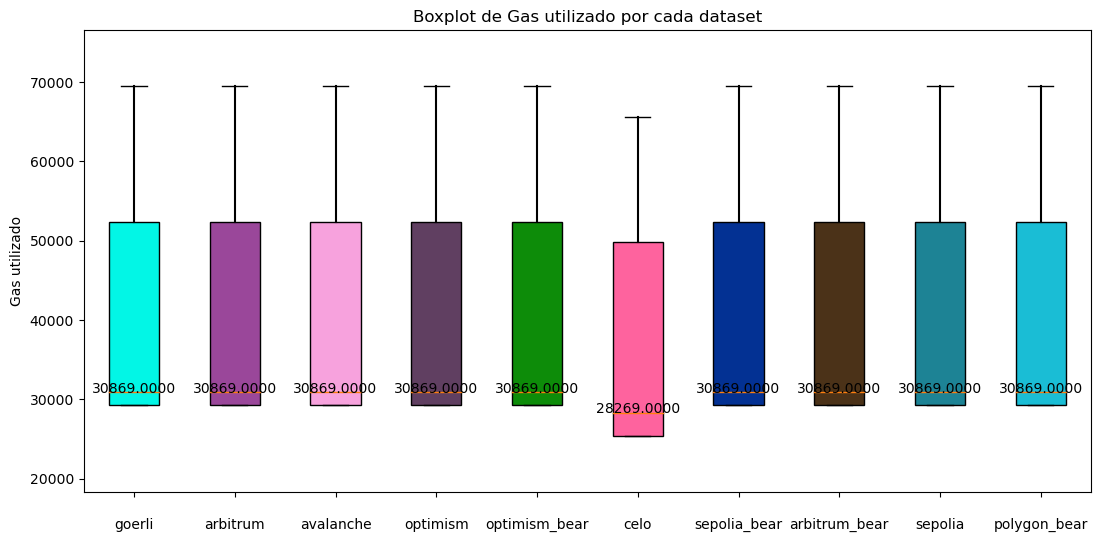

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
data = []
labels = []
colors = []

for dataset_name, dataset_values in datasets_resumen.items():
    data.append(dataset_values['Gas utilizado'])
    labels.append(dataset_name)
    colors.append(np.random.rand(3,))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(13, 6))

# Cambiar el color de cada boxplot y guardar las cajas en una lista
boxes = ax.boxplot(data, labels=labels, patch_artist=True, whiskerprops=dict(linestyle='-', linewidth=1.5))
for box, color in zip(boxes['boxes'], colors):
    box.set_facecolor(color)

# Obtener la mediana de cada set de datos y mostrarla en el gráfico
for i, median in enumerate(boxes['medians']):
    median_val = np.median(data[i])
    ax.text(i + 1, median_val, f"{median_val:.4f}", horizontalalignment='center', fontsize=10)

# Configurar las etiquetas y leyendas del gráfico
ax.set_ylabel('Gas utilizado')
ax.set_title('Boxplot de Gas utilizado por cada dataset')
plt.xticks(range(1, len(labels) + 1), labels)
ax.tick_params(axis='x', which='major', pad=15)

# Ajustar los límites del eje y
ymin, ymax = ax.get_ylim()
margin = (ymax - ymin) * 0.1
ax.set_ylim(ymin - margin, ymax + margin)

# Mostrar el gráfico
plt.show()



<section id="boxplot-dolares">
  <h2>Representación mediante BoxPlot del Coste en dólares</h2>

</section>

Se va a observar una representación de coste en dólares y a continuación se va a poder apreciar una lista con el valor de la mediana para cada box

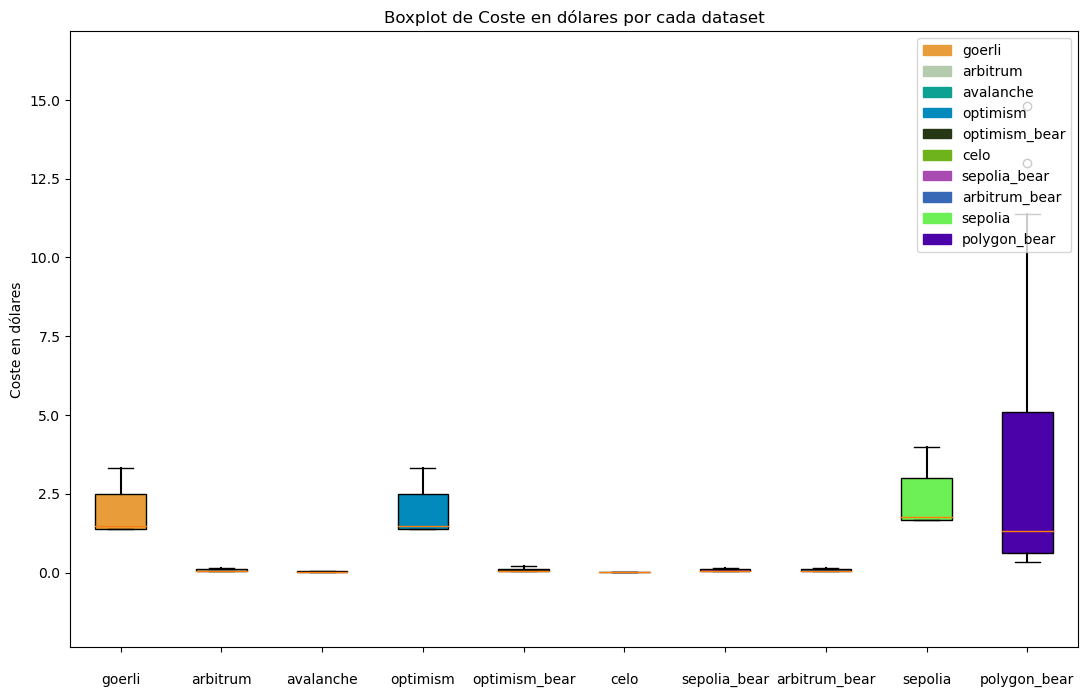

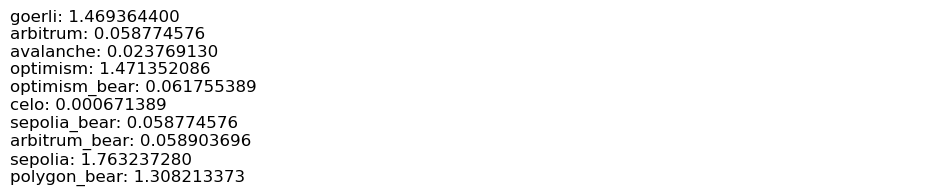

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = []
labels = []
colors = []

for dataset_name, dataset_values in datasets_resumen.items():
    data.append(dataset_values['Coste en dólares'])
    labels.append(dataset_name)
    colors.append(np.random.rand(3,))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(13, 8))

# Cambiar el color de cada boxplot y guardar las cajas en una lista
boxes = ax.boxplot(data, labels=labels, patch_artist=True, whiskerprops=dict(linestyle='-', linewidth=1.5))
for box, color in zip(boxes['boxes'], colors):
    box.set(facecolor=color)

# Obtener la mediana de cada set de datos y mostrarla debajo de la grafica
medians = [np.median(d) for d in data]
median_labels = [f"{dataset_name}: {median:.9f}" for dataset_name, median in zip(labels, medians)]

# Agregar leyenda con rectángulos de colores
rects = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(rects, labels, loc='upper right')

# Configurar las etiquetas y leyendas del gráfico
ax.set_ylabel('Coste en dólares')
ax.set_title('Boxplot de Coste en dólares por cada dataset')
ax.tick_params(axis='x', which='major', pad=15)

# Ajustar los límites del eje y
ymin, ymax = ax.get_ylim()
margin = (ymax - ymin) * 0.1
ax.set_ylim(ymin - margin, ymax + margin)

# Mostrar el gráfico
plt.show()

# Mostrar texto con la mediana debajo de la gráfica
fig, ax = plt.subplots(figsize=(12, 1))
ax.axis('off')
ax.text(0, 0, '\n'.join(median_labels), ha='left', va='center', fontsize=12)
plt.show()



<section id="representacion-variacion-duracion">
  <h2>Representación de la variación del coste total en función de la duración de las transacciones</h2>

</section>

A continuación, se presentará un gráfico que muestra la evolución del valor de cada transacción en función del tiempo transcurrido desde la obtención de los datos. Este gráfico permitirá observar cómo ha ido aumentando o disminuyendo dicho valor a lo largo del tiempo.

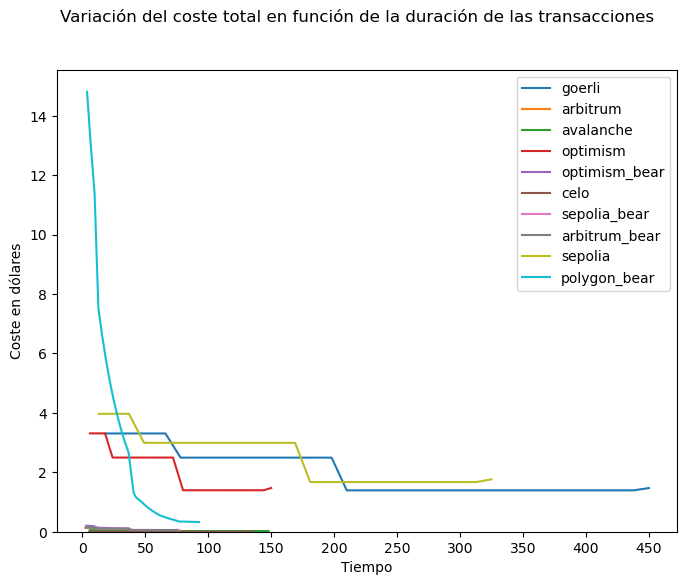

In [27]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de línea para cada conjunto de datos en datasets_resumen
for dataset_name, dataset_values in datasets_resumen.items():
    x = dataset_values['Duración']
    y = dataset_values['Coste en dólares']
    ax.plot(x, y, label=dataset_name)
    
# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Tiempo')
ax.set_ylabel('Coste en dólares')
ax.legend()
fig.suptitle('Variación del coste total en función de la duración de las transacciones')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True)) # Establece el eje x como continuo
plt.ylim(bottom=0) # Asegura que el eje y empiece desde cero
plt.ylim(bottom=0)  # Asegura que el eje y empiece desde cero
plt.show()



<section id="representacion-aumento-coste">
  <h2>Representación del aumento del coste total en función de la duración</h2>

</section>

A continuación, se presentará un gráfico que muestra la evolución del valor de cada transacción en función del tiempo transcurrido desde la obtención de los datos. Este gráfico permitirá observar cómo ha ido aumentando dicho valor a lo largo del tiempo.

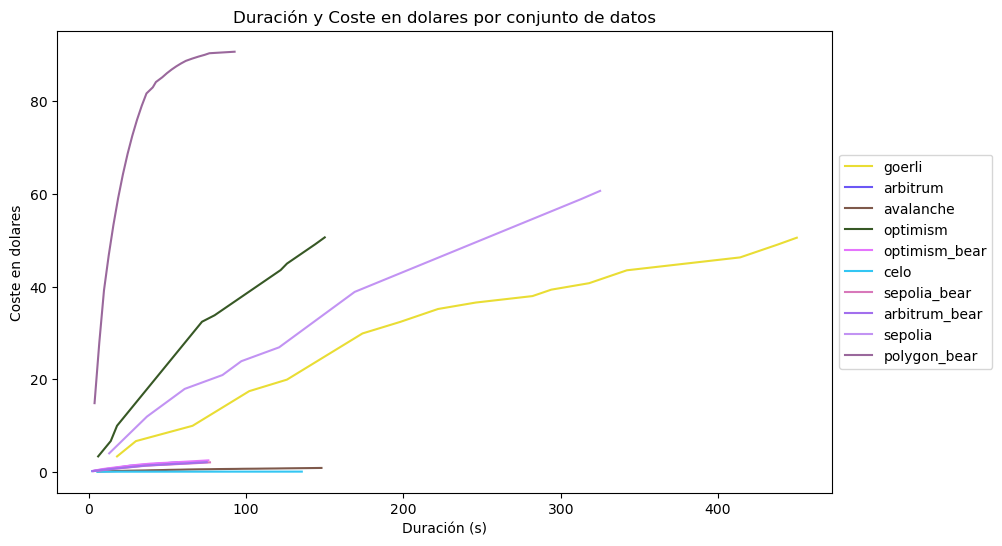

In [28]:
import random
import matplotlib.pyplot as plt

# Crear una lista de colores aleatorios para cada conjunto de datos
colores = [tuple(random.random() for _ in range(3)) for _ in datasets_resumen]

# Configurar el gráfico de líneas
fig, ax = plt.subplots()
for i, (dataset_name, dataset_values) in enumerate(datasets_resumen.items()):
    duracion_media = dataset_values['Duración']
    coste_media = dataset_values['Coste en dólares total']
    ax.plot(duracion_media, coste_media, color=colores[i], label=dataset_name)

ax.set_xlabel('Duración (s)')
ax.set_ylabel('Coste en dolares')
ax.set_title('Duración y Coste en dolares por conjunto de datos')

# Ubicar la leyenda al lado derecho del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Ajustar el tamaño de la figura
fig.set_size_inches(10, 6)

# Mostrar el gráfico
plt.show()



# Resumen Total


<section id="estadisticas">
  <h2>Estadísticas del conjunto de datos</h2>

</section>


Se obseva una tabla en la que se representa la duración media y el coste medio de cada dataset

In [29]:
from prettytable import PrettyTable

# Crear la tabla y definir las columnas
table = PrettyTable()
table.field_names = ["Conjunto de Datos", "Media de Coste en dólares", "Duración Media (s)", "Coste Total ($)", "Tiempo Total (s)"]

for dataset_name, dataset_values in datasets_resumen.items():
    # Obtener la media de la duración y el coste en ether
    media_duracion = dataset_values['Diferencia de tiempo'].mean()
    media_coste_dolares = dataset_values['Coste en dólares total'].mean()
    coste_total_dolares = dataset_values['Coste en dólares total'].iloc[-1]
    tiempo_total_horas = dataset_values['Duración'].iloc[-1]  # Convertir de segundos a horas

    # Agregar una fila a la tabla con los valores para el conjunto de datos actual
    table.add_row([dataset_name, f"{media_duracion:.2f}", f"{media_coste_dolares:.2f}", f"{coste_total_dolares:.2f}", f"{tiempo_total_horas:.2f}"])

# Imprimir la tabla
print(table)


+-------------------+---------------------------+--------------------+-----------------+------------------+
| Conjunto de Datos | Media de Coste en dólares | Duración Media (s) | Coste Total ($) | Tiempo Total (s) |
+-------------------+---------------------------+--------------------+-----------------+------------------+
|       goerli      |           18.00           |       30.76        |      50.55      |      450.00      |
|      arbitrum     |            2.25           |        1.23        |       2.02      |      56.25       |
|     avalanche     |            5.92           |        0.50        |       0.82      |      147.92      |
|      optimism     |            6.00           |       30.79        |      50.61      |      150.00      |
|   optimism_bear   |            3.04           |        1.58        |       2.45      |      76.04       |
|        celo       |            5.42           |        0.01        |       0.02      |      135.42      |
|    sepolia_bear   |       